In [63]:
import pandas as pd
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
d = {"yes" : 1, "no" : 0}
data.smoker = data.smoker.map(d)

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [8]:
data = pd.get_dummies(data, drop_first = True)

In [9]:
data.head()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0


In [10]:
data.shape

(1338, 9)

In [11]:
y = data["charges"]
x = data.drop("charges", axis = 1)

In [15]:
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [65]:
model = Sequential()
model.add(Dense(units = 9, activation = 'relu'))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 150, activation = 'relu'))
model.add(Dense(units = 150, activation = 'relu'))

model.add(Dense(units = 150, activation = 'relu'))

model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 30, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse')

In [66]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_true), epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 321787232.0000 - val_loss: 318723648.0000
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 246403104.0000 - val_loss: 149424512.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 135300656.0000 - val_loss: 135236992.0000
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 130617904.0000 - val_loss: 135379104.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 130562904.0000 - val_loss: 135125760.0000
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 131514600.0000 - val_loss: 136883952.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 131432232.0000 - val_loss: 135437680.0000
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 129072512.0000 - val_loss: 133624712.0000
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 1291383

34/34 [==============================] - 0s 2ms/step - loss: 35552120.0000 - val_loss: 31125482.0000
Epoch 73/100
34/34 [==============================] - 0s 3ms/step - loss: 34535152.0000 - val_loss: 29972018.0000
Epoch 74/100
34/34 [==============================] - 0s 2ms/step - loss: 32394892.0000 - val_loss: 27389834.0000
Epoch 75/100
34/34 [==============================] - 0s 2ms/step - loss: 32275496.0000 - val_loss: 26929962.0000
Epoch 76/100
34/34 [==============================] - 0s 2ms/step - loss: 31594284.0000 - val_loss: 26493080.0000
Epoch 77/100
34/34 [==============================] - 0s 2ms/step - loss: 31224060.0000 - val_loss: 27952842.0000
Epoch 78/100
34/34 [==============================] - 0s 2ms/step - loss: 30992506.0000 - val_loss: 25958020.0000
Epoch 79/100
34/34 [==============================] - 0s 2ms/step - loss: 33180916.0000 - val_loss: 26643508.0000
Epoch 80/100
34/34 [==============================] - 0s 2ms/step - loss: 31417036.0000 - val_loss: 2

<AxesSubplot:>

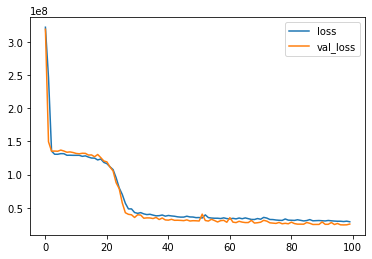

In [67]:
kayip = pd.DataFrame(history.history)
kayip.plot()

In [68]:
tahmin = model.predict(x_test)

9/9 [==============================] - 0s 873us/step


In [69]:
mean_squared_error(tahmin, y_true) ** 0.5

5051.511962687947

In [70]:
r2_score(tahmin, y_true) * 100

75.85291525495622

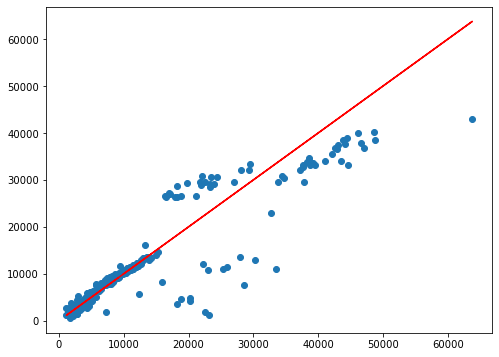

In [64]:
fig = plt.figure(figsize = (8, 6))
plt.scatter(y_true, tahmin)
plt.plot(y_true.values, y_true.values, 'r')